Label is: 5


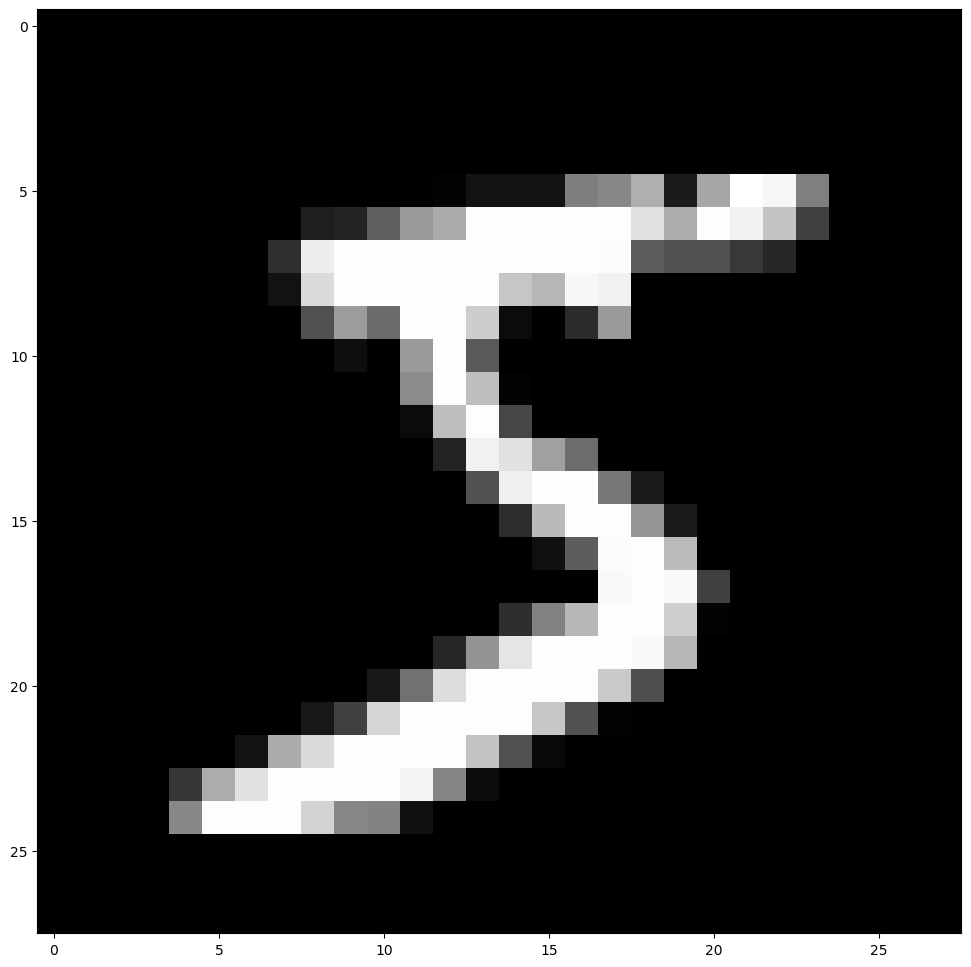

In [30]:
# Base libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

# Learning stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# Let's start by bringing in the MNIST dataset
# load_data() returns 4 NumPy arrays
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# So let's visualize the first image
plt.figure(figsize=(12,12))
plt.imshow((train_images[0]),cmap="gray")

# ...and look at this first label
print('Label is: ' + np.str(train_labels[0]))


In [31]:
# Set up a training set w/ 50K images and normalized greyscale values between 0 and 1
# Basically this gives us the activations
I_train = train_images[0:50000] / 255

# Converts a class vector (integers) to binary class matrix (aka one-hot encoding)
L_train = to_categorical(train_labels[0:50000],10)

# Set up a validation dataset from the training data
I_val = train_images[50001:60000] / 255
L_val = to_categorical(train_labels[50001:60000],10)

# Now we set up the test data
I_test = test_images / 255
L_test = to_categorical(test_labels,10)

# Clean up
del train_images, train_labels, test_images, test_labels

# Reshaping
print('Training images before reshaping: ' + np.str(I_train[0]))

# Images
I_train = np.reshape(I_train, (I_train.shape[0],28,28,1))
I_val = np.reshape(I_val, (I_val.shape[0],28,28,1))
I_test = np.reshape(I_test, (I_test.shape[0],28,28,1))


print('Training images after first reshaping: ' + np.str(I_train[0]))
I_train.shape

# We then reshape again to get a 1d array
I_train_flat = I_train.reshape([I_train.shape[0], 784])
I_val_flat = I_val.reshape([I_val.shape[0], 784])
I_test_flat = I_test.reshape([I_test.shape[0], 784])


print('Training images after second reshaping: ' + np.str(I_train_flat[0]))
print('Training labels (no reshaping): ' + np.str(L_train[0]))

I_train_flat.shape
L_train.shape



Training images before reshaping: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        

(50000, 10)

In [35]:
# define fcNN with 2 hidden layers
model = Sequential()

# 2 hidden layers: one with 100 neurons, the next with 50 neurons
# Try out different activations, e.g. sigmoid, relu
model.add(Dense(100, batch_input_shape=(None, 784)))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# summarize model along with number of model weights
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
__________________________________________________

In [36]:
# train the model
history=model.fit(I_train_flat, L_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(I_val_flat, L_val)
                 )


Train on 50000 samples, validate on 9999 samples
Epoch 1/10
50000/50000 - 4s - loss: 0.3926 - accuracy: 0.8879 - val_loss: 0.1821 - val_accuracy: 0.9495
Epoch 2/10
50000/50000 - 3s - loss: 0.1621 - accuracy: 0.9519 - val_loss: 0.1374 - val_accuracy: 0.9618
Epoch 3/10
50000/50000 - 3s - loss: 0.1173 - accuracy: 0.9653 - val_loss: 0.1091 - val_accuracy: 0.9686
Epoch 4/10
50000/50000 - 3s - loss: 0.0886 - accuracy: 0.9739 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 5/10
50000/50000 - 3s - loss: 0.0710 - accuracy: 0.9788 - val_loss: 0.0921 - val_accuracy: 0.9727
Epoch 6/10
50000/50000 - 3s - loss: 0.0606 - accuracy: 0.9818 - val_loss: 0.1049 - val_accuracy: 0.9691
Epoch 7/10
50000/50000 - 3s - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0826 - val_accuracy: 0.9747
Epoch 8/10
50000/50000 - 3s - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0942 - val_accuracy: 0.9740
Epoch 9/10
50000/50000 - 3s - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0974 - val_accuracy: 0.9742
Epoch 10/10
500

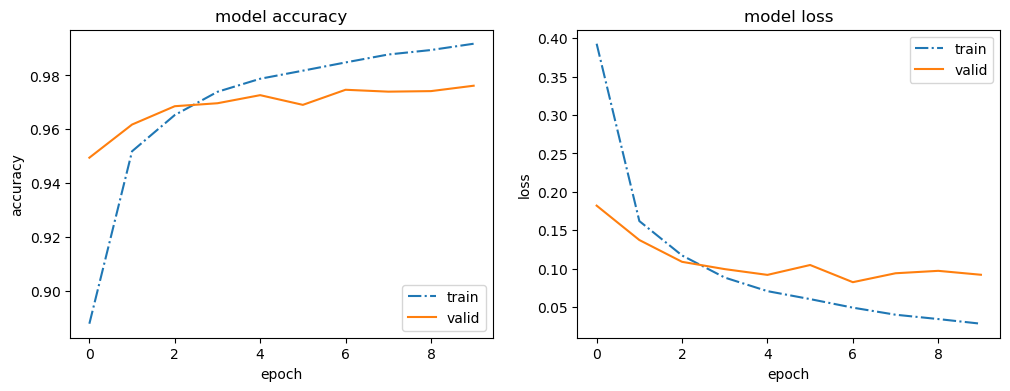

In [37]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()